### Keras and Tensorflow 

In [1]:
### Data Collection
import pandas_datareader as pdr
key=""

In [2]:
## Getting the data from tiingo website for the Apple Stock using API Key
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-08 00:00:00+00:00,122.57,124.640,122.54,124.48,60761614,112.951123,114.858677,112.923478,114.711233,60761614,0.0,1.0
1,AAPL,2015-07-09 00:00:00+00:00,120.07,124.060,119.22,123.85,78595038,110.647315,114.324193,109.864020,114.130673,78595038,0.0,1.0
2,AAPL,2015-07-10 00:00:00+00:00,123.28,123.850,121.21,121.94,61354474,113.605405,114.130673,111.697851,112.370564,61354474,0.0,1.0
3,AAPL,2015-07-13 00:00:00+00:00,125.66,125.755,124.32,125.03,41440538,115.798631,115.886175,114.563789,115.218071,41440538,0.0,1.0
4,AAPL,2015-07-14 00:00:00+00:00,125.61,126.370,125.04,126.04,31768139,115.752554,116.452912,115.227286,116.148810,31768139,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-06-26 00:00:00+00:00,353.63,365.3200,353.02,364.41,51314211,353.63,365.3200,353.02,364.41,51314211,0.0,1.0
1253,AAPL,2020-06-29 00:00:00+00:00,361.78,362.1736,351.28,353.25,32661519,361.78,362.1736,351.28,353.25,32661519,0.0,1.0
1254,AAPL,2020-06-30 00:00:00+00:00,364.80,365.9800,360.00,360.08,35055821,364.80,365.9800,360.00,360.08,35055821,0.0,1.0
1255,AAPL,2020-07-01 00:00:00+00:00,364.11,367.3600,363.91,365.12,27690454,364.11,367.3600,363.91,365.12,27690454,0.0,1.0
1256,AAPL,2020-07-02 00:00:00+00:00,364.11,370.4700,363.64,367.85,28814516,364.11,370.4700,363.64,367.85,28814516,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       122.57
1       120.07
2       123.28
3       125.66
4       125.61
         ...  
1252    353.63
1253    361.78
1254    364.80
1255    364.11
1256    364.11
Name: close, Length: 1257, dtype: float64

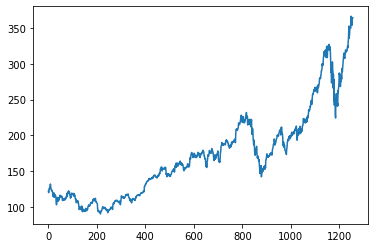

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.11669503]
 [0.10764329]
 [0.11926572]
 ...
 [0.9937362 ]
 [0.99123792]
 [0.99123792]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [18]:
train_data

array([[0.11669503],
       [0.10764329],
       [0.11926572],
       [0.12788298],
       [0.12770194],
       [0.13208299],
       [0.13820196],
       [0.14222093],
       [0.15109164],
       [0.14631232],
       [0.12628987],
       [0.12607263],
       [0.12368297],
       [0.11741917],
       [0.11962779],
       [0.11821572],
       [0.11597089],
       [0.11209674],
       [0.10174155],
       [0.08798291],
       [0.09073464],
       [0.08975705],
       [0.09116912],
       [0.10637605],
       [0.08381911],
       [0.09015533],
       [0.08982947],
       [0.09276223],
       [0.09710706],
       [0.0947174 ],
       [0.08932257],
       [0.08077773],
       [0.05583113],
       [0.04627249],
       [0.04851733],
       [0.07006047],
       [0.08175531],
       [0.08309497],
       [0.081176  ],
       [0.06292769],
       [0.07965531],
       [0.07252254],
       [0.06853977],
       [0.07954669],
       [0.07172599],
       [0.08048807],
       [0.08642601],
       [0.090

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Epoch 1/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0181 - val_loss: 0.0527
Epoch 2/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0029 - val_loss: 0.0040
Epoch 3/100
716/716 [==============================] - 2s 3ms/sample - loss: 8.3762e-04 - val_loss: 0.0061
Epoch 4/100
716/716 [==============================] - 2s 2ms/sample - loss: 7.2966e-04 - val_loss: 0.0034
Epoch 5/100
716/716 [==============================] - 2s 2ms/sample - loss: 5.2957e-04 - val_loss: 0.0043
Epoch 6/100
716/716 [==============================] - 2s 2ms/sample - loss: 5.2311e-04 - val_loss: 0.0041
Epoch 7/100
716/716 [==============================] - 2s 2ms/sample - loss: 4.9188e-04 - val_loss: 0.0033
Epoch 8/100
716/716 [==============================] - 2s 2ms/sample - loss: 4.6887e-04 - val_loss: 0.0032
Epoch 9/100
716/716 [==============================] - 2s 3ms/sample - loss: 5.0462e-04 - val_loss: 0.003

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.0.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

146.56400907255926

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

262.9642992394013

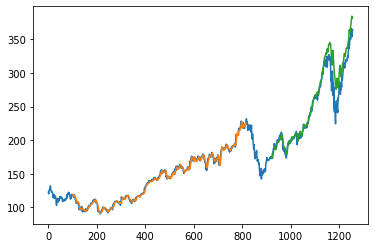

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [43]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.8301169484774976,
 0.8575980303414318,
 0.8491618088996707,
 0.8494514645714907,
 0.8279083239798691,
 0.8446359390274812,
 0.832615228646946,
 0.8063651833882474,
 0.7525254353886818,
 0.7159564068213912,
 0.7325029870741157,
 0.6632390745501285,
 0.6626597632064885,
 0.7548064738042654,
 0.720446069734603,
 0.7690358086824288,
 0.7334805749665086,
 0.7193960679242551,
 0.6366269597016548,
 0.7060357000615519,
 0.6701546037148342,
 0.5716716752959919,
 0.6793511712951231,
 0.5498750859915277,
 0.5884354973025817,
 0.5660233896954995,
 0.5591802744487492,
 0.5029146601976902,
 0.48528187117564003,
 0.5667837358340274,
 0.5618595894130853,
 0.6086389804120352,
 0.5698975343060938,
 0.5954958543031972,
 0.5936130924363663,
 0.5451681813244507,
 0.5597233788334119,
 0.5469785292733264,
 0.6232303848799742,
 0.6122234693508094,
 0.6362648901118796,
 0.6432166262355626,
 0.6622614866577358,
 0.712227090046707,
 0.7027408667945981,
 0.7109236395235164,
 0.696839132481263,
 0.6755856475614

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0754038]
101
1 day input [0.85759803 0.84916181 0.84945146 0.82790832 0.84463594 0.83261523
 0.80636518 0.75252544 0.71595641 0.73250299 0.66323907 0.66265976
 0.75480647 0.72044607 0.76903581 0.73348057 0.71939607 0.63662696
 0.7060357  0.6701546  0.57167168 0.67935117 0.54987509 0.5884355
 0.56602339 0.55918027 0.50291466 0.48528187 0.56678374 0.56185959
 0.60863898 0.56989753 0.59549585 0.59361309 0.54516818 0.55972338
 0.54697853 0.62323038 0.61222347 0.63626489 0.64321663 0.66226149
 0.71222709 0.70274087 0.71092364 0.69683913 0.67558565 0.64459249
 0.67258047 0.66870633 0.69745465 0.69817879 0.6815598  0.71468916
 0.73666679 0.7195409  0.73434954 0.7502806  0.76139614 0.7726565
 0.79579275 0.81346175 0.80042724 0.78681343 0.79365654 0.78703067
 0.81328071 0.80669105 0.82874108 0.82012383 0.82751005 0.81968934
 0.8246859  0.8251928  0.82407039 0.83822731 0.84362214 0.85006698
 0.83992903 0.87316702 0.88026359 0.91838951 0.95043267 0.88909808
 0.8995981  0.91476882 0.94768094 0.

11 day output [[1.3561484]]
12 day input [0.66265976 0.75480647 0.72044607 0.76903581 0.73348057 0.71939607
 0.63662696 0.7060357  0.6701546  0.57167168 0.67935117 0.54987509
 0.5884355  0.56602339 0.55918027 0.50291466 0.48528187 0.56678374
 0.56185959 0.60863898 0.56989753 0.59549585 0.59361309 0.54516818
 0.55972338 0.54697853 0.62323038 0.61222347 0.63626489 0.64321663
 0.66226149 0.71222709 0.70274087 0.71092364 0.69683913 0.67558565
 0.64459249 0.67258047 0.66870633 0.69745465 0.69817879 0.6815598
 0.71468916 0.73666679 0.7195409  0.73434954 0.7502806  0.76139614
 0.7726565  0.79579275 0.81346175 0.80042724 0.78681343 0.79365654
 0.78703067 0.81328071 0.80669105 0.82874108 0.82012383 0.82751005
 0.81968934 0.8246859  0.8251928  0.82407039 0.83822731 0.84362214
 0.85006698 0.83992903 0.87316702 0.88026359 0.91838951 0.95043267
 0.88909808 0.8995981  0.91476882 0.94768094 0.9459068  0.9464137
 0.9391361  0.97226547 1.         0.9765741  0.99388102 0.95329302
 0.98280169 0.9937362  

20 day output [[1.5413055]]
21 day input [0.57167168 0.67935117 0.54987509 0.5884355  0.56602339 0.55918027
 0.50291466 0.48528187 0.56678374 0.56185959 0.60863898 0.56989753
 0.59549585 0.59361309 0.54516818 0.55972338 0.54697853 0.62323038
 0.61222347 0.63626489 0.64321663 0.66226149 0.71222709 0.70274087
 0.71092364 0.69683913 0.67558565 0.64459249 0.67258047 0.66870633
 0.69745465 0.69817879 0.6815598  0.71468916 0.73666679 0.7195409
 0.73434954 0.7502806  0.76139614 0.7726565  0.79579275 0.81346175
 0.80042724 0.78681343 0.79365654 0.78703067 0.81328071 0.80669105
 0.82874108 0.82012383 0.82751005 0.81968934 0.8246859  0.8251928
 0.82407039 0.83822731 0.84362214 0.85006698 0.83992903 0.87316702
 0.88026359 0.91838951 0.95043267 0.88909808 0.8995981  0.91476882
 0.94768094 0.9459068  0.9464137  0.9391361  0.97226547 1.
 0.9765741  0.99388102 0.95329302 0.98280169 0.9937362  0.99123792
 0.99123792 1.07540381 1.10573196 1.14722884 1.19035435 1.22974932
 1.26285565 1.28885365 1.308256

29 day output [[1.6628232]]
[[1.0754038095474243], [1.1057319641113281], [1.1472288370132446], [1.190354347229004], [1.229749321937561], [1.2628556489944458], [1.288853645324707], [1.3082560300827026], [1.3225451707839966], [1.333829402923584], [1.3443719148635864], [1.356148362159729], [1.3705804347991943], [1.3882218599319458], [1.408841609954834], [1.43169367313385], [1.4555968046188354], [1.4793763160705566], [1.5019869804382324], [1.5227493047714233], [1.5413055419921875], [1.557755470275879], [1.5724692344665527], [1.5859078168869019], [1.5986864566802979], [1.6112288236618042], [1.6238654851913452], [1.6367204189300537], [1.6497646570205688], [1.66282320022583]]


In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [48]:
import matplotlib.pyplot as plt

In [49]:
len(df1)

1257

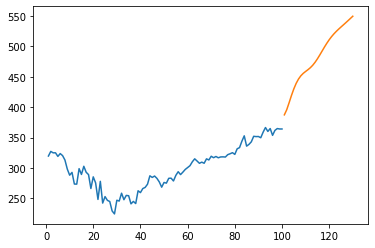

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

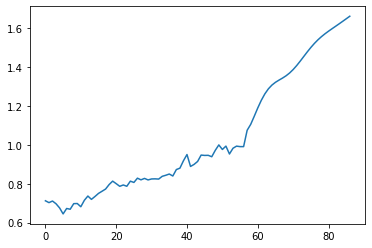

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

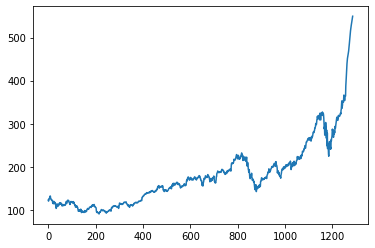

In [54]:
plt.plot(df3)